## Linear pulse propagation

$E(z,t) = A(t)\cos(\omega t)$

Gaussian pulse:
$A(t) = exp(-t^2/T^2)$

In [7]:
%matplotlib inline
%load_ext autoreload
%autoreload 2
%matplotlib notebook

import numpy as np
import matplotlib.pyplot as plt
import time

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


### Envelope

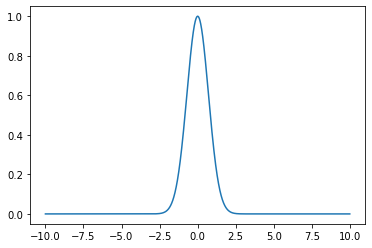

In [2]:
tp = 1
t = np.arange(-10*tp,10*tp,tp/100)

Ain =  np.exp(-t**2/tp**2)
plt.plot(t,Ain)

### Field

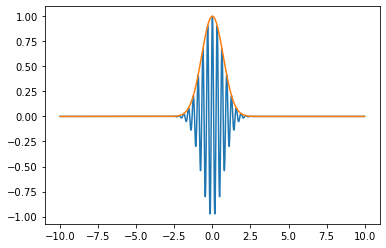

In [4]:
w = 20
Ecarrier = np.exp(1j*w*t)
Ein = np.real(Ain*Ecarrier)
plt.plot(t,Ein,t,Ain);

### Dispersion

<IPython.core.display.Javascript object>


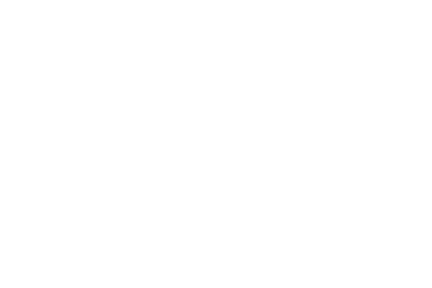

<IPython.core.display.Javascript object>


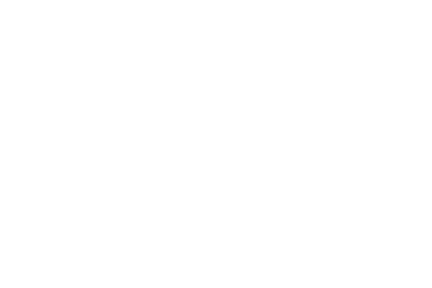

In [12]:
L = 2
beta2 = 0.1
phi2 = -beta2*L

f = 1-2*1j*phi2/tp**2
Aout = 1/(np.sqrt(f))*np.exp((-t**2/tp**2)/f)

Eout = np.real(Aout*Ecarrier)
plt.plot(t,Eout,t,abs(Aout));
#plt.plot(t,np.angle(Aout))

<IPython.core.display.Javascript object>


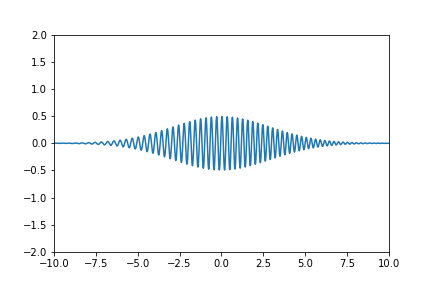

<IPython.core.display.Javascript object>


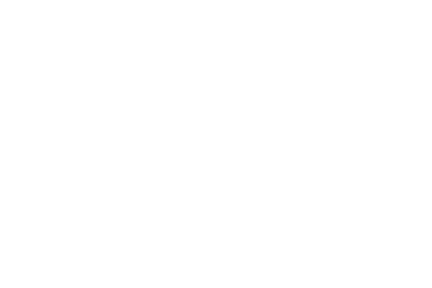

In [16]:
fig = plt.figure()
ax = fig.add_subplot(111)
plt.ion()
fig.canvas.draw()

for z in range(0,25):
    phi2 = -beta2*z
    f = 1-2*1j*phi2/tp**2
    Aout = 1/(np.sqrt(f))*np.exp((-t**2/tp**2)/f)
    Eout = np.real(Aout*Ecarrier)
    if z%5==0:
        ax.clear()
        ax.plot(t,Eout)
        ax.axes.set_ylim(-2,2)
        ax.axes.set_xlim(-10,10)
        fig.canvas.draw()
        time.sleep(0.005)